The following is a task I did for pre-interview phase.

In [22]:
# adding nessacsary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#reading the dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It's good to plot some of the featuristics of the dataset to get deeper insight of the features.

The relationship/correlation of the features:

<AxesSubplot:>

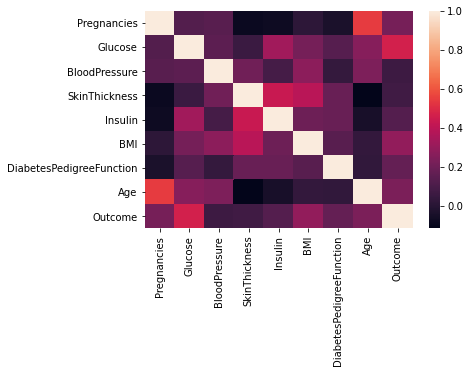

In [24]:
correlation_data = dataset.corr(method='pearson')
sns.heatmap(correlation_data)

From the correlation plot, it can be seen that features such as age/pregnancy, glucose/outcome and some others are correlated. This is nothing unexpected because age affects pregnancy, and vice versa. Also glucose levels have a direct effect on Outcome(being diabetic/healthy).

In [25]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

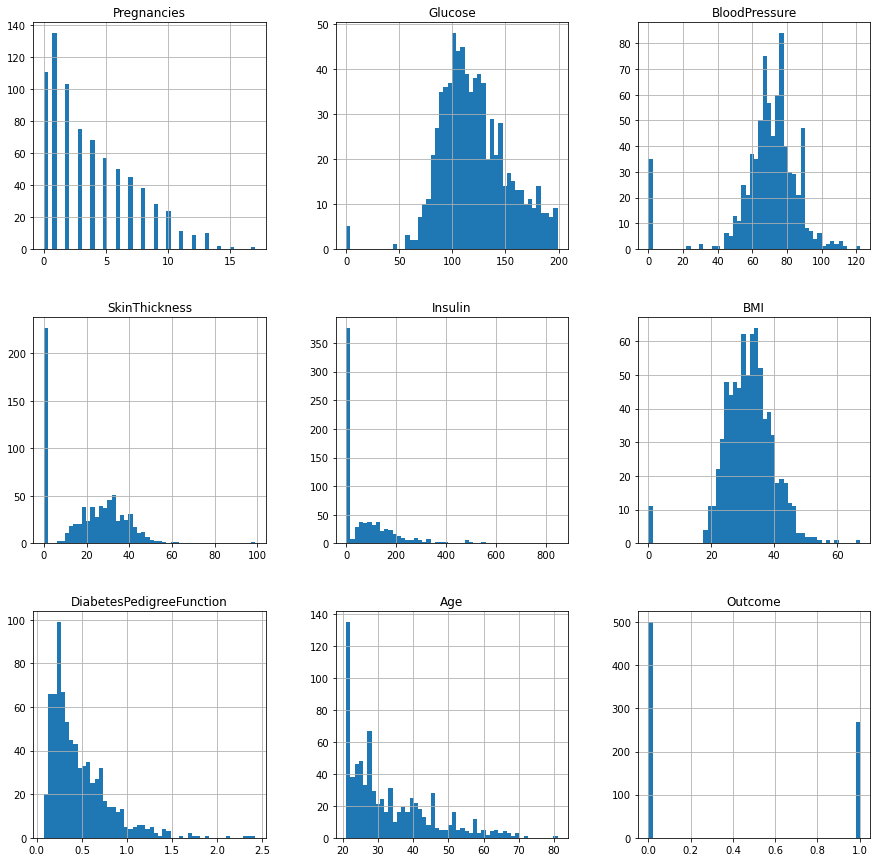

In [26]:
dataset.hist(bins=50, figsize=(15, 15))

As it can be seen above, there are a lot of 0 values in most of the features. We should do something about this, as these rows will affect the result of the model, for example the model can't decide correctly if some person is diabetic or not, if it has been trained with more than 370 samples saying insuling level was zero! (Because insulin levels have direct effect on the diabetes test results).

There are two approaches for this, remove rows containing zero values, or fill the values with mean of the column. The first one is extreme and destructive, as it removes almost 80% of the dataset in case of Insulin/SkinThickness. We use a hybrid approach, remove zero values in columns with low zero frequency(BMI, Glucose, BloodPressure) and fill the zero values in columns with high zero frequency(Insulin, Age).

In [38]:
med_insulin = dataset['Insulin'].median()
med_skin = dataset['SkinThickness'].median()

# filling the Insulin and SkinThickness with their column median value
dataset['Insulin'] = dataset['Insulin'].replace(0, med_insulin)
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, med_skin)

#removing zero values of glucose/BMI/BloodPressure as there is not too many sample of them
dataset = dataset[(dataset['BloodPressure']!=0) & (dataset['BMI']!=0) & (dataset['Glucose']!=0)]

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

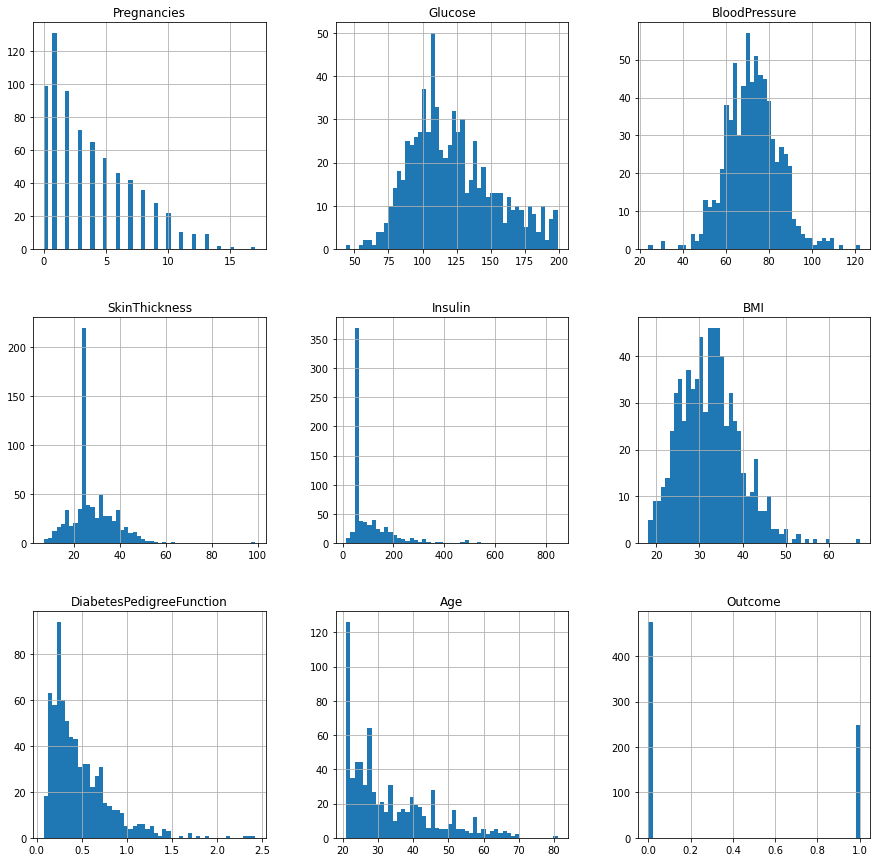

In [39]:
dataset.hist(bins=50, figsize=(15, 15))

It has been asked to 'Make the dataset imbalance with 10% of the True (1) label' so we first counted true/false outcomes and then up-sampled the true samples.

As it can be seen, from the population, there are 268 diabetic and 500 normal. To make the dataset imbalance in a way that there are 10% more diabetic people, there are 2 approaches possible. 

1- We can under-sample the diabet-free class, more accurately if we remove 321 samples from those 500, the fraction of diabetics would be around 60%(which will be 10% more than diabet-free). But this approach would not be best, hence we would lose data. 

2- Second approach is over-sample from the diabetic class where we could add sample randomly(which may cause over-fitting since we are adding exact copies to our dataset) or from the value domains(mean, max/min, ...) of the existing diabetic samples.(482 samples are needed to be precise)

**We will use the second approach**

In [40]:
from imblearn import RandomOverSampler

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']


# we want 10% more of the True(1) label so the sampling strategy would be 60%
ros = RandomOverSampler(sampling_strategy=0.6)

X_over, y_over = ros.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'